In [29]:
import os
import glob
import json
import h5py

import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns

from pipeline.python.classifications import utils as util
from pipeline.python.classifications import test_responsivity as resp
from pipeline.python.utils import label_figure, natural_keys



/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/test_responsivity.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    

In [35]:
%matplotlib notebook

In [7]:
rootdir = '/n/coxfs01/2p-data'

animalid = 'JC084'
session = '20190522'
fov = 'FOV1_zoom2p0x'
traceid = 'traces001'


In [8]:
experiment_name = 'gratings'

In [155]:
# Load data:
trace_type = 'corrected'
exp = util.Experiment(experiment_name, animalid, session, fov, traceid, trace_type=trace_type)
#blobs.data.traces, blobs.data.labels = check_counts_per_condition(blobs.data.traces, blobs.data.labels)


gratings
[combined_gratings_static] ... getting data path.
[mean_Slice01_Channel01_File001_gratings1.png] ... getting data path.
... no data arrays found for: mean_Slice01_Channel01_File001_gratings1.png
[max_std_Slice01_Channel01_gratings.png] ... getting data path.
... no data arrays found for: max_std_Slice01_Channel01_gratings.png
Renaming experiment to run name: combined_gratings_static
[combined_gratings_static]...loading data array
(/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/data_arrays/datasets.npz)


In [156]:
if experiment_name == 'gratings':
    excluded_params = ['position', 'xpos', 'ypos']
all_params = [c for c in exp.data.sdf.columns if c not in excluded_params]
tested_params = [c for c in all_params if len(exp.data.sdf[c].unique()) > 1]
stim_params = dict((str(p), sorted(exp.data.sdf[p].unique())) for p in tested_params)
stim_params

{'ori': [0, 45, 90, 135, 180, 225, 270, 315],
 'sf': [0.1, 0.5],
 'size': [20, 200],
 'speed': [10, 20]}

#### Group roi traces into mean value per trial

In [157]:
gdf = resp.group_roidata_stimresponse(exp.data.traces, exp.data.labels)

In [158]:
gdf.head()

,base_mean,base_std,config,df,dff,meanstim,snr,trial,zscore
0,36.350102,21.774312,config001,-14.313036,-0.393755,22.037066,0.606245,trial00922,1.012067
1,38.951999,30.138989,config001,27.055310,0.694581,66.007309,1.694581,trial00922,2.190097
2,115.763668,46.548101,config001,-6.588123,-0.056910,109.175545,0.943090,trial00922,2.345435
3,22.839315,39.342717,config001,18.095467,0.792295,40.934782,1.792295,trial00922,1.040467
4,52.395257,30.058923,config001,37.557654,0.716814,89.952912,1.716814,trial00922,2.992553
5,35.372597,38.453065,config001,17.088599,0.483103,52.461196,1.483103,trial00922,1.364292
6,32.076257,35.522702,config001,18.723859,0.583730,50.800116,1.583730,trial00922,1.430075
7,75.970524,37.879995,config001,-13.310297,-0.175203,62.660227,0.824797,trial00922,1.654177
8,43.107696,35.648206,config001,5.483367,0.127202,48.591062,1.127202,trial00922,1.363072
9,44.734326,38.193954,config001,45.508730,1.017311,90.243056,2.017311,trial00922,2.362758


#### Test 1 cell

In [462]:
from scipy.stats import stats
from scipy.stats import linregress



In [569]:
roi = 42 #30 #38 # 31 # 31 # 30

In [570]:
mean_stim = gdf.get_group(roi)['meanstim']
mean_bas = gdf.get_group(roi)['base_mean']

<IPython.core.display.Javascript object>


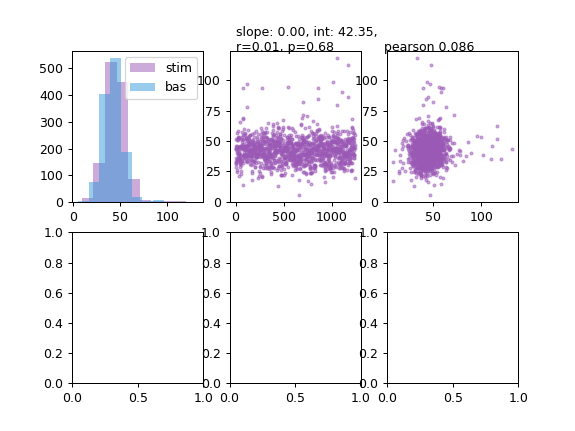

Text(0,124.434,u'pearson 0.086')

In [572]:
fig, axes = pl.subplots(2,3) 

ax = axes[0, 0]
ax.hist(mean_stim, label='stim', alpha=0.5)
ax.hist(mean_bas, label='bas', alpha=0.5)
ax.legend()

ax = axes[0,1]
ax.scatter(range(len(mean_bas)), mean_bas, alpha=0.5, s=5)
slope, intercept, r_value, p_value, std_err = linregress(range(len(mean_bas)), mean_bas) #x and y are arrays or lists.
linregress_str = 'slope: %.2f, int: %.2f,\nr=%.2f, p=%.2f' % (slope, intercept, r_value, p_value)
ax.text(0, ax.get_ylim()[1], linregress_str)

ax = axes[0, 2]
ax.scatter(mean_stim[0:-1], mean_bas[1:], alpha=0.5, s=5)
r, h = stats.pearsonr(mean_stim[0:-1], mean_bas[1:]) #stats.pearsonr(mean_stim[0:-1], mean_bas[1:])
ax.text(0, ax.get_ylim()[1], 'pearson %.3f' % r)



<IPython.core.display.Javascript object>


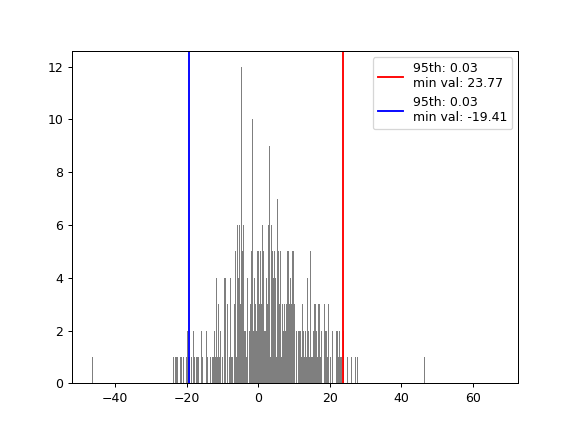

In [577]:
true_values = mean_stim - mean_bas

vals_above = [val for val in true_values if stats.percentileofscore(true_values, val, 'rank') >= (100-2.5)]
true_perc_above = len(vals_above) / float(len(true_values))

vals_below = [val for val in true_values if stats.percentileofscore(true_values, val, 'rank') <= 2.5]
true_perc_below = len(vals_below) / float(len(true_values))


fig, ax = pl.subplots()
ax.hist(true_values, len(true_values), alpha=0.5, color='k')
ax.axvline(x=min(vals_above), color='r', label='95th: %.2f\nmin val: %.2f' % (true_perc_above, min(vals_above)))

ax.axvline(x=max(vals_below), color='b', label='95th: %.2f\nmin val: %.2f' % (true_perc_below, max(vals_below)))

ax.legend()

In [574]:
def get_percentile_above(values):
    vals_above = [val for val in values if stats.percentileofscore(values, val, 'rank') >= (100-2.5)]
    perc_above = len(vals_above) / float(len(values))
    return perc_above

In [576]:

n_trials = len(mean_bas)
n_iters = 1000
shuff = [get_percentile_above([draw2_subtract(mean_bas) for _ in range(n_trials)]) for _ in range(n_iters)]


In [579]:
shuff

[0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.025806451612903226,
 0.02580645

<IPython.core.display.Javascript object>


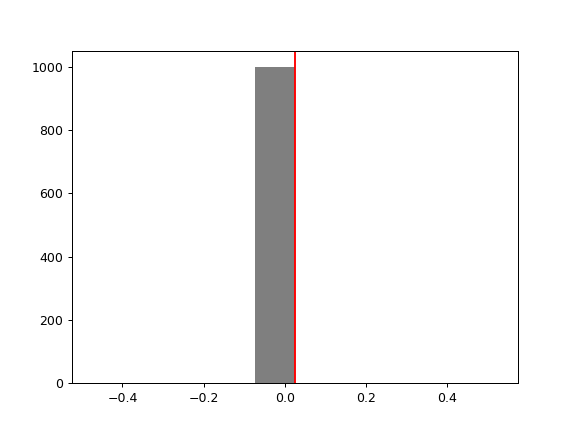

In [578]:
fig, ax = pl.subplots()
ax.hist(shuff, color='k', alpha=0.5)
ax.axvline(x=true_perc_above, color='r')


In [521]:
def probability_hist(probs, ax=None, alpha=0.5):
    """Create histogram of probabilities"""
    if ax is None:
        fig, ax = pl.subplots()
    weights = np.ones_like(probs)/float(len(probs))
    ax.hist(probs, weights=weights, alpha=alpha)
    #ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    return ax


<IPython.core.display.Javascript object>


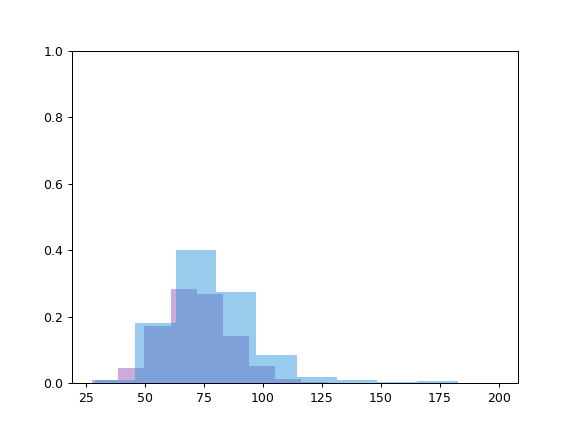

In [522]:
fig, ax = pl.subplots()
ax = probability_hist(mean_bas, ax=ax, alpha=0.5)
ax = probability_hist(mean_stim, ax=ax, alpha=0.5)

In [524]:
from sklearn.metrics import roc_curve, auc


In [525]:
def plot_roc(good_pdf, bad_pdf, ax):
    #Total
    total_bad = np.sum(bad_pdf)
    total_good = np.sum(good_pdf)
    #Cumulative sum
    cum_TP = 0
    cum_FP = 0
    #TPR and FPR list initialization
    TPR_list=[]
    FPR_list=[]
    #Iteratre through all values of x
    for i in range(len(x)):
        #We are only interested in non-zero values of bad
        if bad_pdf[i]>0:
            cum_TP+=bad_pdf[len(x)-1-i]
            cum_FP+=good_pdf[len(x)-1-i]
        FPR=cum_FP/total_good
        TPR=cum_TP/total_bad
        TPR_list.append(TPR)
        FPR_list.append(FPR)
    #Calculating AUC, taking the 100 timesteps into account
    auc=np.sum(TPR_list)/len(x) #100
    #Plotting final ROC curve
    ax.plot(FPR_list, TPR_list)
    ax.plot(x,x, "--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("ROC Curve", fontsize=14)
    ax.set_ylabel('TPR', fontsize=12)
    ax.set_xlabel('FPR', fontsize=12)
    ax.grid()
    ax.legend(["AUC=%.3f"%auc])

<IPython.core.display.Javascript object>


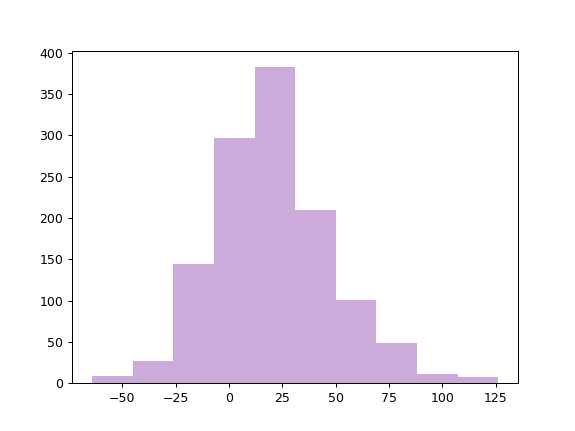

(array([   9.,   27.,  144.,  297.,  383.,  210.,  101.,   49.,   12.,    8.]),
 array([ -64.13530668,  -45.10919538,  -26.08308407,   -7.05697277,
          11.96913854,   30.99524984,   50.02136115,   69.04747245,
          88.07358376,  107.09969506,  126.12580637]),
 <a list of 10 Patch objects>)

In [474]:
df_values = mean_stim - mean_bas
pl.figure()
pl.hist(df_values, alpha=0.5)

<IPython.core.display.Javascript object>


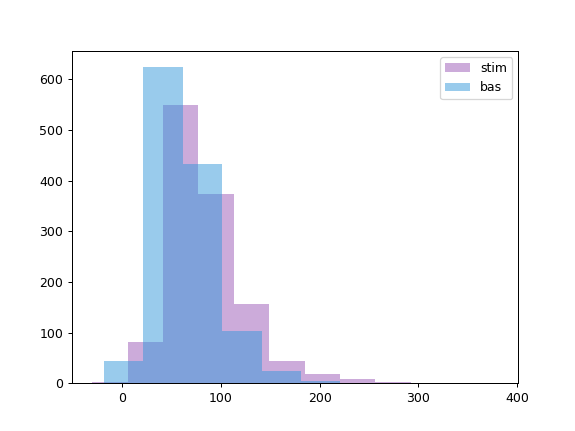

In [440]:
pl.figure()
pl.hist(mean_stim, label='stim', alpha=0.5)
pl.hist(mean_bas, label='bas', alpha=0.5)
pl.legend()

#### shuffle

In [441]:
def get_range(mean_values):
#    return np.max(np.abs(mean_values)) - np.min(np.abs(mean_values))
    return np.max(mean_values) - np.min(mean_values)


In [442]:
def draw2_subtract(mean_bas, n=2):
    a, b = mean_bas.sample(n).values
    return np.abs( a-b )

In [443]:
true_diff = np.abs( mean_stim - mean_bas )

true_range = np.max(true_diff) - np.min(true_diff) # np.max(np.abs(true_diff)) - np.min(np.abs(true_diff))
print(true_range)

126.10049808


<IPython.core.display.Javascript object>


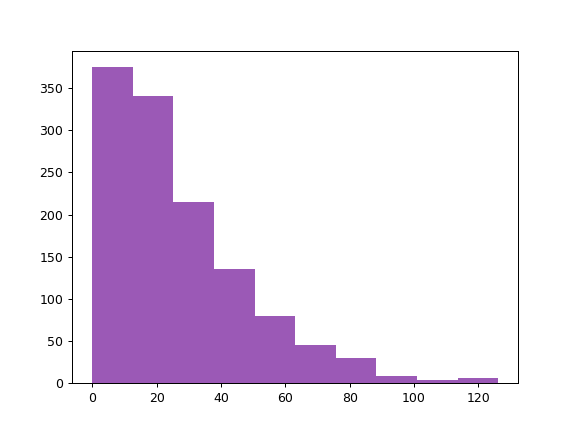

(array([ 375.,  340.,  215.,  136.,   80.,   45.,   30.,    9.,    4.,    6.]),
 array([  2.53082862e-02,   1.26353581e+01,   2.52454079e+01,
          3.78554577e+01,   5.04655075e+01,   6.30755573e+01,
          7.56856071e+01,   8.82956569e+01,   1.00905707e+02,
          1.13515757e+02,   1.26125806e+02]),
 <a list of 10 Patch objects>)

In [444]:
pl.figure()
pl.hist(true_diff)

In [445]:
print get_range(mean_stim)
print get_range(mean_bas)

357.645821351
398.455719665


In [446]:
n_iters = 1000
shuffled = [get_range([draw2_subtract(mean_bas) for _ in range(n_samples)]) for _ in range(n_iters)]


<IPython.core.display.Javascript object>


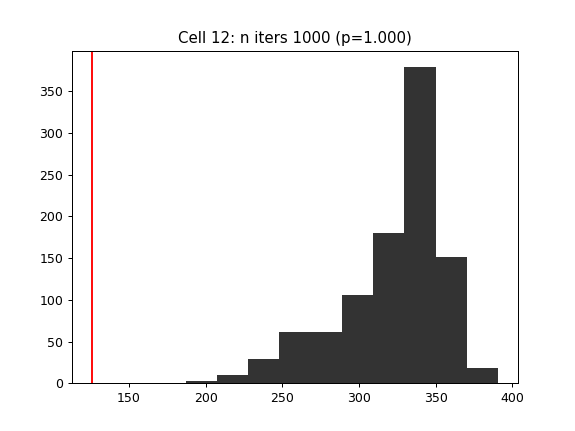

Text(0.5,1,u'Cell 12: n iters 1000 (p=1.000)')

In [447]:
two_tailed = False

fig, ax = pl.subplots() #.figure()
ax.hist(shuffled, color='k', alpha=0.8)
ax.axvline(x=true_range, color='r')
if two_tailed:
    n_above = sum(shuffled >= true_range) / float(len(shuffled))
    n_below = sum(shuffled <= true_range) / float(len(shuffled))
    pval = np.min([n_above, n_below]) * 2.
else:
    pval = sum(shuffled >= true_range)/ float(len(shuffled))
ax.set_title("Cell %i: n iters %i (p=%.3f)" % (int(roi+1), n_iters, pval))

<IPython.core.display.Javascript object>


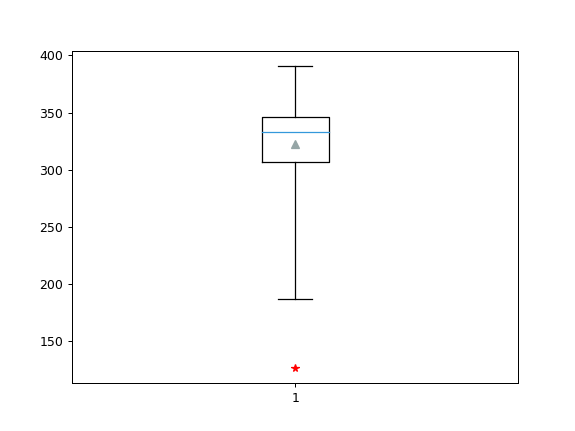

In [448]:
pl.figure()
pl.boxplot(shuffled, showmeans=True, whis = 99)
pl.plot(1, true_range, 'r*')

#### Look at cell's traces

In [280]:
mean_traces = dict((cfg, []) for cfg in exp.data.labels['config'].unique())
for cfg, trial in exp.data.labels.groupby(['config', 'trial']):
    tix = trial.index.tolist()
    mean_traces[cfg[0]].append(exp.data.traces[roi][tix].values)

for cfg, tmat in mean_traces.items():
    curr_trace = np.array(tmat).mean(axis=0)
    mean_traces[cfg] = curr_trace

In [290]:
stim_on = exp.data.labels['stim_on_frame'].unique()[0]
nframes_on = exp.data.labels['nframes_on'].unique()[0]

<IPython.core.display.Javascript object>


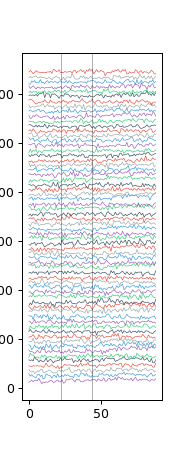

In [292]:
pl.figure(figsize=(2, 5))
offset = 50
for ci, (cfg, curr_trace) in enumerate(mean_traces.items()):
    pl.plot(curr_trace + ci*offset, lw=0.5)
pl.axvline(x=stim_on, color='k', lw=0.5, alpha=0.5)
pl.axvline(x=stim_on+nframes_on, color='k', lw=0.5, alpha=0.5)


np.array(mean_traces['config021']).mean(axis=0).shape

<IPython.core.display.Javascript object>


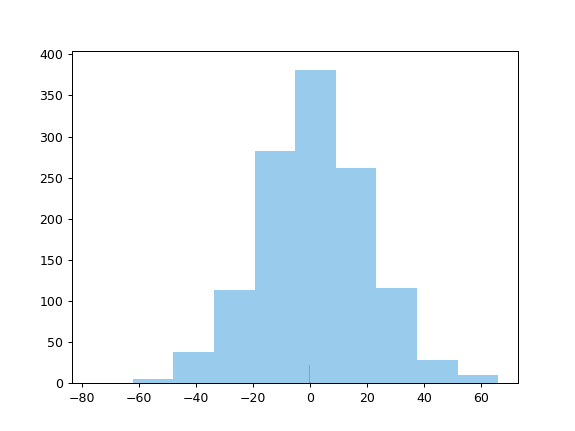

shuff: -0.00
true: 1.55


In [180]:
pl.figure()
pl.hist(shuff, label='null', alpha=0.5)
pl.hist(true_diff, alpha=0.5)
print("shuff: %.2f" % np.mean(shuff))
print("true: %.2f" % np.mean(true_diff))
